In [1]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
# plt.rcParams['axes.grid'] = True
sns.set()

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm

In [3]:
# Сигнал - случайный вектор из нормального распределения. Отклик - скалярное произведение сигнала на вектор весов плюс нормальный шум из N(0,1)
series_type = "default"

# Сигнал равен номеру итерации. Параметры для генератора включают: ar1, ma1, ma2 - коэффициенты для ARIMA(1, 0, 2);
# series_type = "arima"

# Cоздание синтезатора, cпособного создавать workers_num наборов параметров, для каждого из которых генерировать временные ряды.
synt = Synthesizer(series_type, dim=20, low=-10, high=10, 
                   noise_var=1, workers_num=3, random_seed=177)

# Создание генератора данных, склеивающего разнородные временные ряды в один 
# В данном случае источник рядов - наш синтезатор
gen = Generator(series_type, synt)

# Получение итогового временного ряда путем получения от синтезатора pieces_num временных рядов 
# произвольного размера из [lower_bound, upper_bound) и их последующей склейки
gen.generate(pieces_num=10, lower_bound=100, upper_bound=200, alternating=True)

In [4]:
# gen.show_time_series()

In [5]:
# gen.draw_merged()

In [6]:
gen.launch()

# Cоздание объекта GMMP алгоритма, работающего total_time итераций, добавляющего экспертов с периодичностью period
# Каждый эксперт представляет из себя LinReg модель, которая при инициализации тренируется на последних train_window точках
algo = Algorithm(series_type, gen, total_time=gen.total_time, train_window=20, a=gen.responses.min(), b=gen.responses.max())

# Запуск алгоритма
algo.run()

100%|████████████████████████████████████████████████████████████████████████| 1661/1661 [00:27<00:00, 60.86it/s]


In [7]:
algo.a, algo.b

(-74.68467733289893, 71.33748682308392)

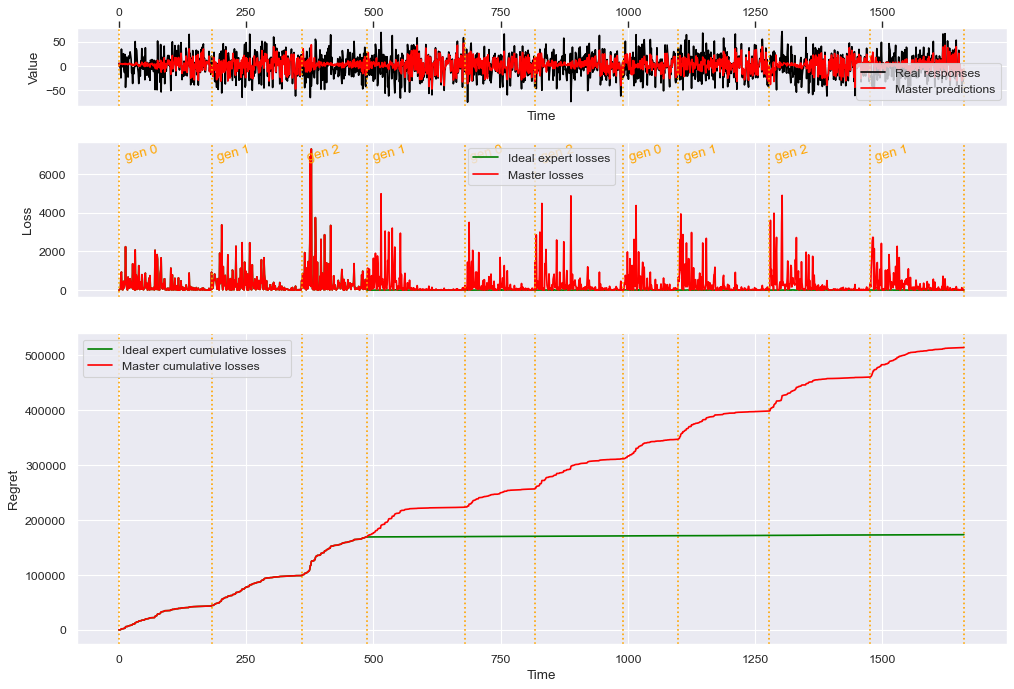

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: xlabel='Time', ylabel='Value'>, <Axes: ylabel='Loss'>,
        <Axes: xlabel='Time', ylabel='Regret'>], dtype=object))

In [8]:
algo.draw_all(show=["master", "ideal"], show_experts=[])

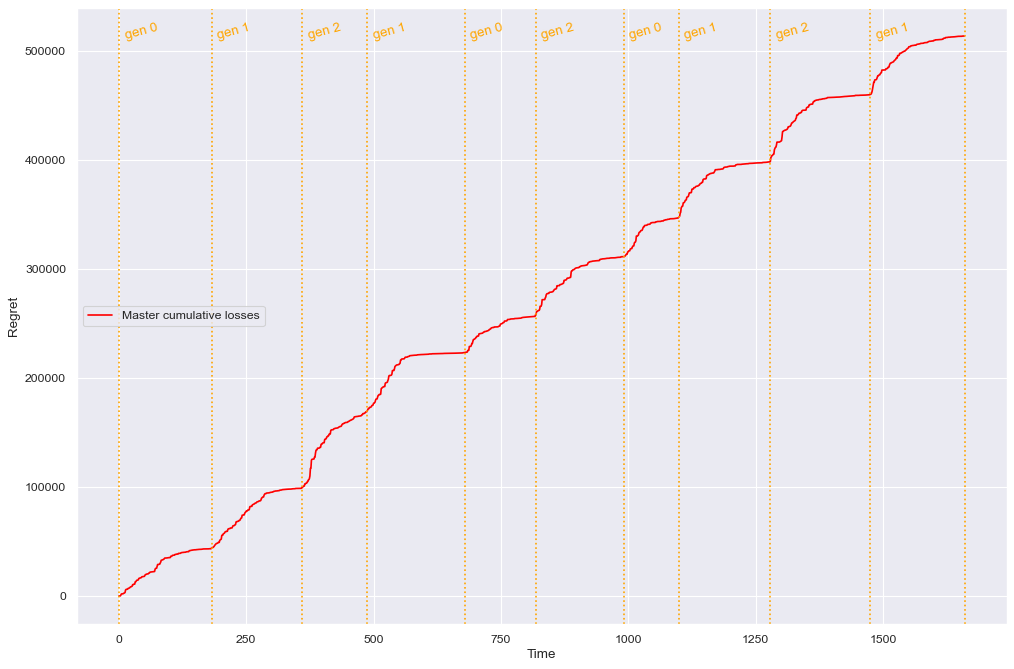

In [9]:
algo.draw_regret()

In [10]:
# fig.savefig("foo3.png")